In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#checking for null values 
df.isna().any().sum()

0

In [ ]:
#Removing User Id Column as all Ids are unique and it wont help us in the analysis.
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
#encoding the categroical column "Gender"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
X = df.iloc[:, :-1].values
Y= df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (320, 3)
Shape of X_test is  (80, 3)
Shape of Y_train is  (320,)
Shape of Y_test is  (80,)


**Feature Scaling**

In [ ]:
#Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [ ]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[48  3]
 [ 5 24]]


In [ ]:
accuracy_score(Y_test, Y_pred)

0.9

In [ ]:
#We got 90 percent of accuracy for Random forest Classifier.

**Visualising the Training set results**

In [ ]:
#as we can only viasualize the data in 2 dimensions , let us limit the Xtrain and Ytrains to 2 d

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
df1=df.drop("Gender",axis=1)
df1


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
X_2d = df1.iloc[:, :-1].values
Y_2d= df1.iloc[:, -1].values

In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train_2d, X_test_2d, Y_train_2d, Y_test_2d = train_test_split(X_2d, Y_2d, test_size=0.2, random_state=0,stratify=Y_2d)
print('Shape of X_train is ', X_train_2d.shape)
print('Shape of X_test is ', X_test_2d.shape)
print('Shape of Y_train is ', Y_train_2d.shape)
print('Shape of Y_test is ', Y_test_2d.shape)

Shape of X_train is  (320, 2)
Shape of X_test is  (80, 2)
Shape of Y_train is  (320,)
Shape of Y_test is  (80,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_2d = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier_2d.fit(X_train_2d, Y_train_2d)

RandomForestClassifier(random_state=0)

In [ ]:
Y_pred_2d = classifier_2d.predict(X_test_2d)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_2d = confusion_matrix(Y_test_2d, Y_pred_2d)
print(cm_2d)

[[47  4]
 [ 5 24]]


In [ ]:
accuracy_score(Y_test_2d, Y_pred_2d)

0.8875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


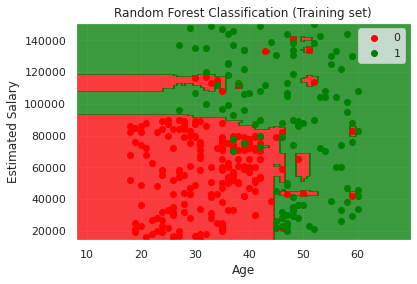

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2d, Y_train_2d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


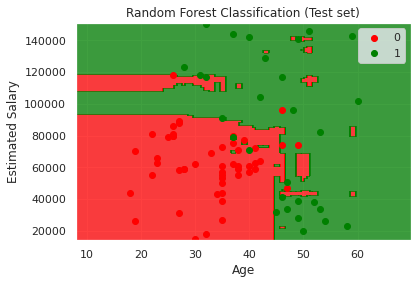

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_2d, Y_test_2d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()